In [2]:
import os
import numpy as np
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing import image
from sklearn.cluster import KMeans
from shutil import copy2
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


2024-07-11 12:42:26.571689: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-11 12:42:29.448547: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [3]:
# Load pre-trained VGG16 model
model = VGG16(weights="imagenet", include_top=False, pooling="avg")

2024-07-11 12:43:10.975414: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
# Function to extract features using VGG16
def extract_features_vgg16(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)
    features = model.predict(img_data)
    return features.flatten()

In [5]:
# Directory containing images
image_dir = "/mnt/d/downloads/Screenshots"
image_paths = [
    os.path.join(image_dir, fname)
    for fname in os.listdir(image_dir)
    if fname.endswith(("png", "jpg", "jpeg"))
]

In [6]:
# Extract features from all images
features = []
for image_path in image_paths:
    features.append(extract_features_vgg16(image_path))
features = np.array(features)

1/1 [==============================] - 0s 228ms/step


In [7]:
features

array([[ 0.        ,  0.78033936,  2.609069  , ..., 11.959801  ,
         2.3087647 ,  7.943607  ],
       [ 0.        ,  0.        ,  4.5369105 , ...,  7.0933614 ,
         2.5597517 ,  4.9243445 ],
       [ 0.3140828 ,  0.        ,  0.73839843, ...,  4.9748244 ,
         2.4007661 ,  2.8293152 ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.10182619],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.09527093,  0.62309885],
       [ 0.67146194,  0.        ,  0.        , ...,  0.        ,
         0.17007922,  0.        ]], dtype=float32)

In [8]:
len(features)

2183

Elbow Method:

Inertia (within-cluster sum of squares) is computed for different numbers of clusters.
The Elbow graph is plotted, and the "elbow point" indicates the optimal number of clusters.

/home/kgvt/miniconda3/envs/mcd-de-dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/kgvt/miniconda3/envs/mcd-de-dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/kgvt/miniconda3/envs/mcd-de-dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/kgvt/miniconda3/envs/mcd-de-dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

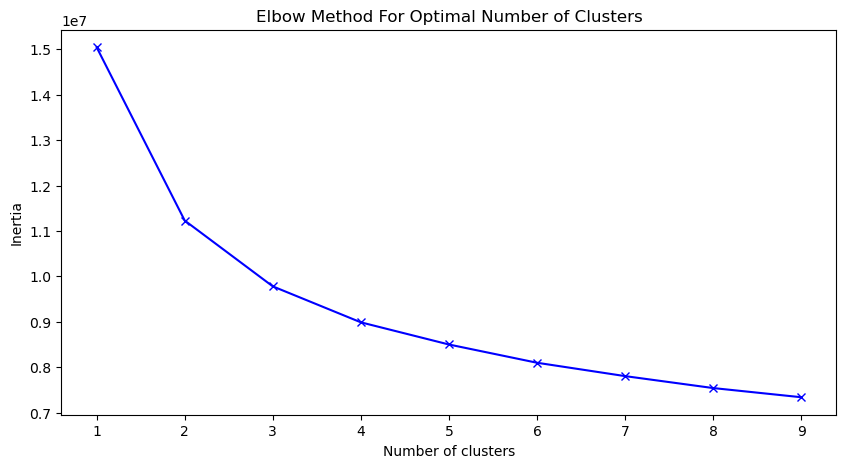

In [9]:
# Elbow Method
inertia = []
K = range(1, 10)  # Adjust the range based on your data
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(10, 5))
plt.plot(K, inertia, "bx-")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method For Optimal Number of Clusters")
plt.show()



Silhouette Analysis:

Silhouette scores are computed for different numbers of clusters.
The Silhouette score graph is plotted, and the peak indicates the optimal number of clusters.

/home/kgvt/miniconda3/envs/mcd-de-dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/kgvt/miniconda3/envs/mcd-de-dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/kgvt/miniconda3/envs/mcd-de-dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/kgvt/miniconda3/envs/mcd-de-dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

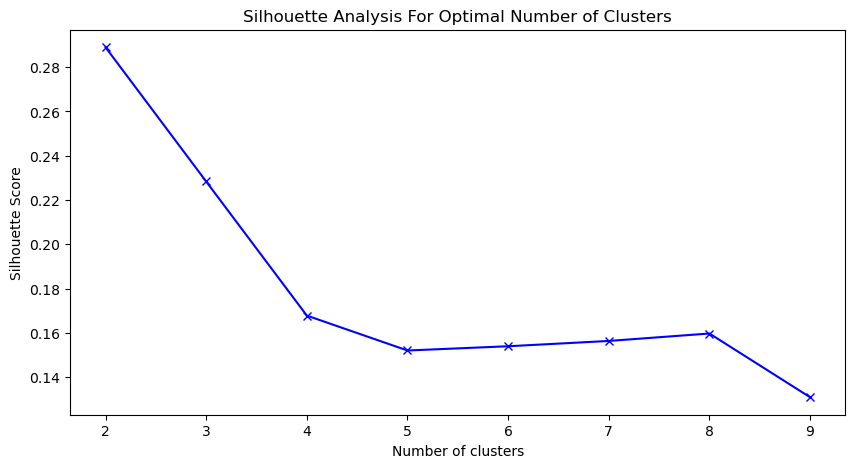

In [10]:
# Silhouette Analysis
silhouette_scores = []
K = range(2, 10)  # Silhouette score requires at least 2 clusters
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    score = silhouette_score(features, kmeans.labels_)
    silhouette_scores.append(score)

# Plot the Silhouette scores
plt.figure(figsize=(10, 5))
plt.plot(K, silhouette_scores, "bx-")
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis For Optimal Number of Clusters")
plt.show()

In [11]:
n_clusters = 2  # Adjust the number of clusters based on your requirement
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(features)
labels = kmeans.labels_

/home/kgvt/miniconda3/envs/mcd-de-dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [12]:
unique_values, counts = np.unique(labels, return_counts=True)

In [13]:
unique_values

array([0, 1], dtype=int32)

In [14]:
counts

array([1638,  545])

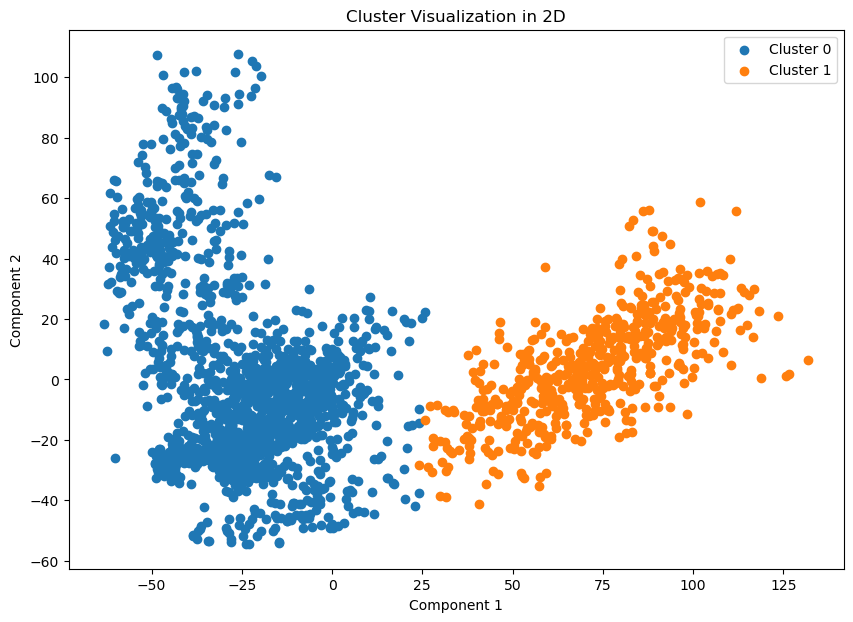

In [15]:
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(features)

plt.figure(figsize=(10, 7))
for cluster in range(n_clusters):
    cluster_points = reduced_features[labels == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster}")
plt.title("Cluster Visualization in 2D")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend()
plt.show()

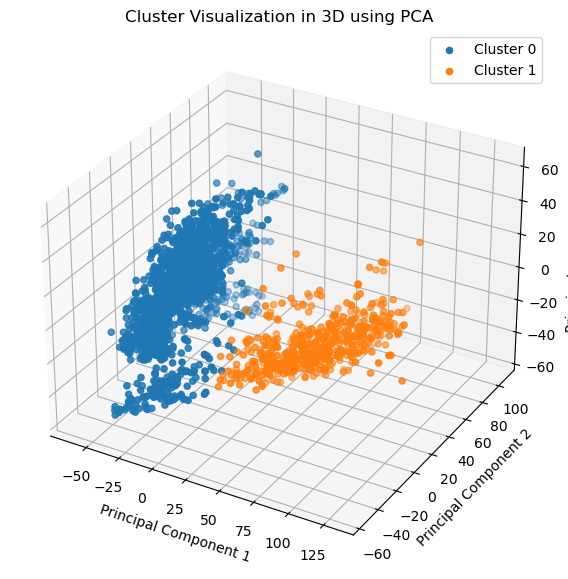

In [16]:
pca_3d = PCA(n_components=3)
reduced_features_3d = pca_3d.fit_transform(features)

# Plot the 3D PCA clusters
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection="3d")
for cluster in range(n_clusters):
    cluster_points = reduced_features_3d[labels == cluster]
    ax.scatter(
        cluster_points[:, 0],
        cluster_points[:, 1],
        cluster_points[:, 2],
        label=f"Cluster {cluster}",
    )
ax.set_title("Cluster Visualization in 3D using PCA")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.legend()
plt.show()

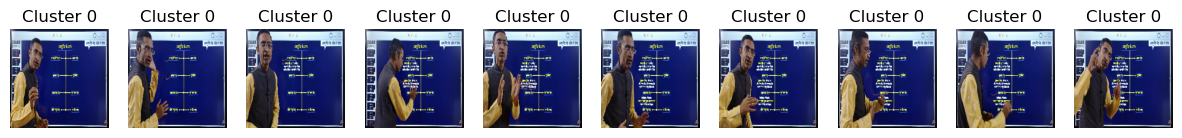

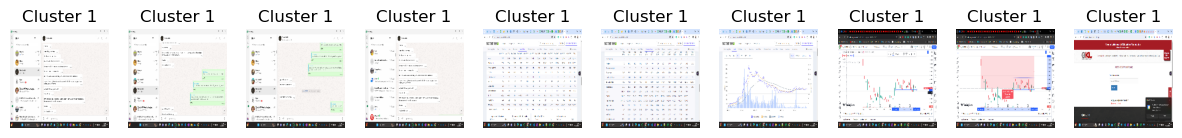

In [17]:


samples_per_cluster = 10
for cluster in range(n_clusters):
    cluster_indices = [i for i, label in enumerate(labels) if label == cluster]
    plt.figure(figsize=(15, 5))
    for i, index in enumerate(cluster_indices[:samples_per_cluster]):
        sample_image_path = image_paths[index]
        sample_image = image.load_img(sample_image_path, target_size=(224, 224))
        plt.subplot(1, samples_per_cluster, i + 1)
        plt.imshow(sample_image)
        plt.title(f"Cluster {cluster}")
        plt.axis("off")


In [18]:
n_clusters_ = 3  # Adjust the number of clusters based on your requirement
kmeans_ = KMeans(n_clusters=n_clusters_, random_state=42)
kmeans_.fit(features)
labels_ = kmeans_.labels_

/home/kgvt/miniconda3/envs/mcd-de-dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [19]:
unique_values_, counts_ = np.unique(labels_, return_counts=True)

In [20]:
unique_values_

array([0, 1, 2], dtype=int32)

In [21]:
counts_

array([ 333,  538, 1312])

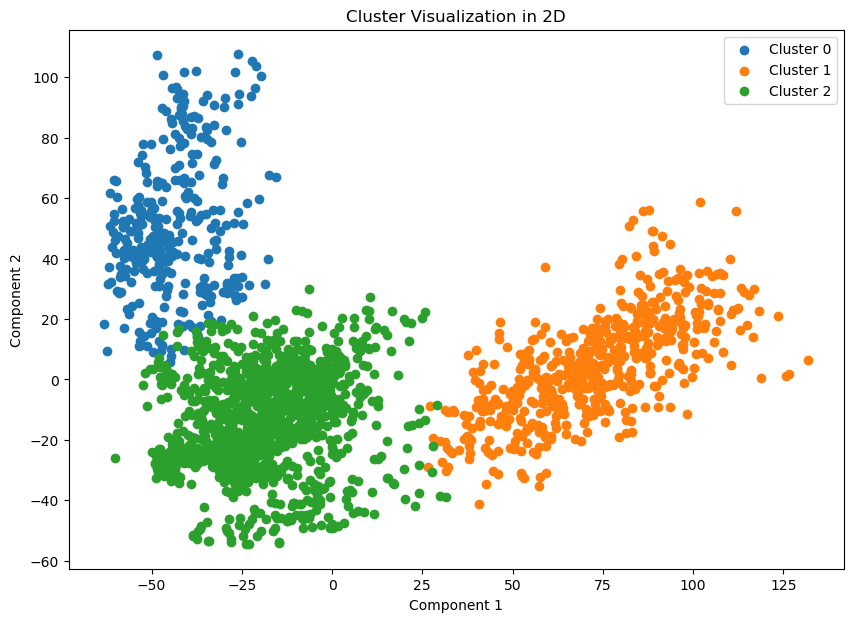

In [22]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

pca = PCA(n_components=2)
reduced_features = pca.fit_transform(features)

plt.figure(figsize=(10, 7))
for cluster in range(n_clusters_):
    cluster_points = reduced_features[labels_ == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster}")
plt.title("Cluster Visualization in 2D")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend()
plt.show()

cluster 3 which is in green colour is not visible lest see in 3-d

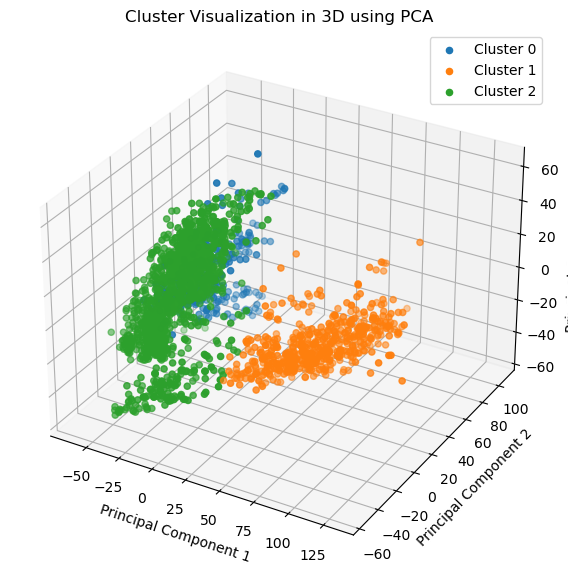

In [23]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

pca_3d = PCA(n_components=3)
reduced_features_3d = pca_3d.fit_transform(features)

# Plot the 3D PCA clusters
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection="3d")
for cluster in range(n_clusters_):
    cluster_points = reduced_features_3d[labels_ == cluster]
    ax.scatter(
        cluster_points[:, 0],
        cluster_points[:, 1],
        cluster_points[:, 2],
        label=f"Cluster {cluster}",
    )
ax.set_title("Cluster Visualization in 3D using PCA")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.legend()
plt.show()

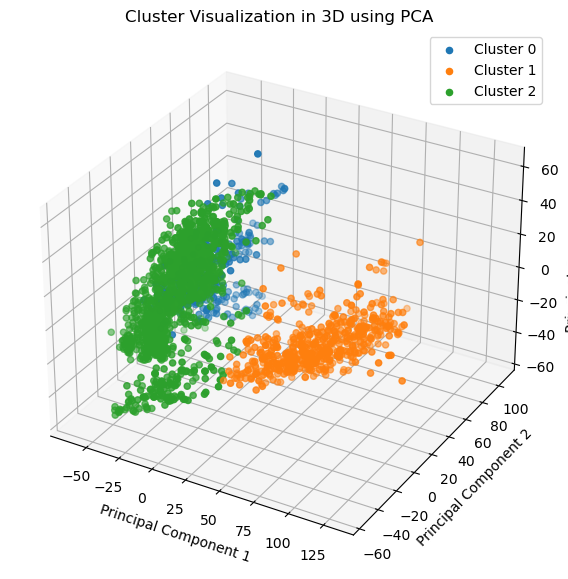

In [24]:
from mpl_toolkits.mplot3d import Axes3D

# Apply PCA for 3 components
pca_3d = PCA(n_components=3)
reduced_features_3d = pca_3d.fit_transform(features)

# Plot the 3D PCA clusters
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection="3d")
for cluster in range(n_clusters_):
    cluster_points = reduced_features_3d[labels_ == cluster]
    ax.scatter(
        cluster_points[:, 0],
        cluster_points[:, 1],
        cluster_points[:, 2],
        label=f"Cluster {cluster}",
    )
ax.set_title("Cluster Visualization in 3D using PCA")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.legend()
plt.show()

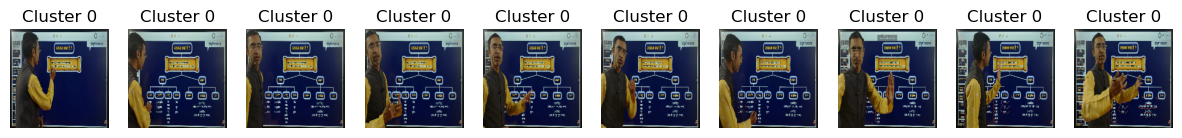

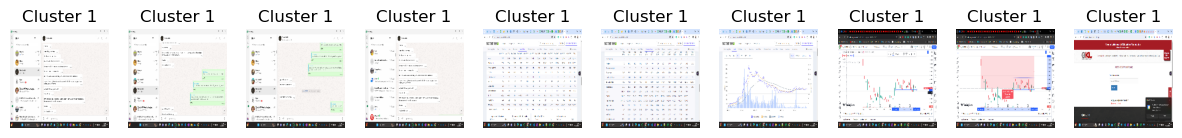

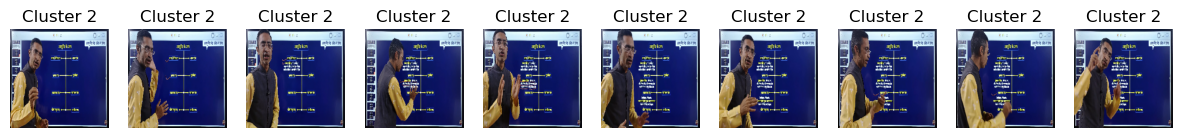

In [25]:
import matplotlib.pyplot as plt

samples_per_cluster = 10
for cluster in range(n_clusters_):
    cluster_indices = [i for i, label in enumerate(labels_) if label == cluster]
    plt.figure(figsize=(15, 5))
    for i, index in enumerate(cluster_indices[:samples_per_cluster]):
        sample_image_path = image_paths[index]
        sample_image = image.load_img(sample_image_path, target_size=(224, 224))
        plt.subplot(1, samples_per_cluster, i + 1)
        plt.imshow(sample_image)
        plt.title(f"Cluster {cluster}")
        plt.axis("off")

no of clusters = 2 seems to be good choice compared to no of clusters = 3 as we can see cluster 2 and clusyer 0 are same and there is a great overlap

In [26]:
n_clusters

2

In [27]:
labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [28]:
unique_values, counts = np.unique(labels, return_counts=True)
print(unique_values, counts)

[0 1] [1638  545]


In [29]:
# Create directories for each cluster
for i in range(n_clusters):
    cluster_dir = os.path.join(image_dir, f"cluster_{i}")
    os.makedirs(cluster_dir, exist_ok=True)

In [30]:
image_paths

['/mnt/d/downloads/Screenshots/Screenshot (2190).png',
 '/mnt/d/downloads/Screenshots/Screenshot (2191).png',
 '/mnt/d/downloads/Screenshots/Screenshot (2192).png',
 '/mnt/d/downloads/Screenshots/Screenshot (2193).png',
 '/mnt/d/downloads/Screenshots/Screenshot (2194).png',
 '/mnt/d/downloads/Screenshots/Screenshot (2195).png',
 '/mnt/d/downloads/Screenshots/Screenshot (2196).png',
 '/mnt/d/downloads/Screenshots/Screenshot (2197).png',
 '/mnt/d/downloads/Screenshots/Screenshot (2198).png',
 '/mnt/d/downloads/Screenshots/Screenshot (2199).png',
 '/mnt/d/downloads/Screenshots/Screenshot (2200).png',
 '/mnt/d/downloads/Screenshots/Screenshot (2201).png',
 '/mnt/d/downloads/Screenshots/Screenshot (2202).png',
 '/mnt/d/downloads/Screenshots/Screenshot (2203).png',
 '/mnt/d/downloads/Screenshots/Screenshot (2204).png',
 '/mnt/d/downloads/Screenshots/Screenshot (2205).png',
 '/mnt/d/downloads/Screenshots/Screenshot (2206).png',
 '/mnt/d/downloads/Screenshots/Screenshot (2207).png',
 '/mnt/d/d

In [31]:
labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [32]:
image_dir

'/mnt/d/downloads/Screenshots'

In [83]:

# Move images to respective cluster directories
for image_path, label in zip(image_paths, labels):
    cluster_dir = os.path.join(image_dir, f"cluster_{label}")
    base_name = os.path.basename(image_path)
    new_path = os.path.join(cluster_dir, f"{base_name}")
    copy2(image_path, new_path)
    print(f"Moved {base_name} to {cluster_dir}")

print("Clustering and renaming complete.")

Moved Screenshot (2190).png to /mnt/d/downloads/Screenshots/cluster_0
Moved Screenshot (2191).png to /mnt/d/downloads/Screenshots/cluster_0
Moved Screenshot (2192).png to /mnt/d/downloads/Screenshots/cluster_0
Moved Screenshot (2193).png to /mnt/d/downloads/Screenshots/cluster_0
Moved Screenshot (2194).png to /mnt/d/downloads/Screenshots/cluster_0
Moved Screenshot (2195).png to /mnt/d/downloads/Screenshots/cluster_0
Moved Screenshot (2196).png to /mnt/d/downloads/Screenshots/cluster_0
Moved Screenshot (2197).png to /mnt/d/downloads/Screenshots/cluster_0
Moved Screenshot (2198).png to /mnt/d/downloads/Screenshots/cluster_0
Moved Screenshot (2199).png to /mnt/d/downloads/Screenshots/cluster_0
Moved Screenshot (2200).png to /mnt/d/downloads/Screenshots/cluster_0
Moved Screenshot (2201).png to /mnt/d/downloads/Screenshots/cluster_0
Moved Screenshot (2202).png to /mnt/d/downloads/Screenshots/cluster_0
Moved Screenshot (2203).png to /mnt/d/downloads/Screenshots/cluster_0
Moved Screenshot (22